<center><h1>House Prices: Advanced Regression Techniques.</h1></center>


<center><img src="https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png" alt="drawing" width="1000"/></center>

<center><h1>Description.</h1><p>Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.</p></center>

In [368]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


<center><h2> Import Libraries. </h2></center>

In [369]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

<center><h2>Import Data.<h2></center>

In [370]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") 
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv") 

In [371]:
print(train.head())
print('**'* 50)
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [372]:
print(train.info())
print('**'* 50)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<center><h1>Data Visualization.</h1><center>

<h3>Let's look at the point of visualization</h3>


 mu = 180921.20 and sigma = 79415.29



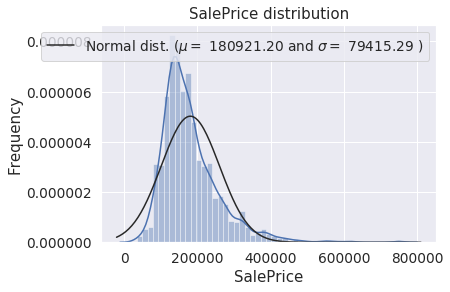

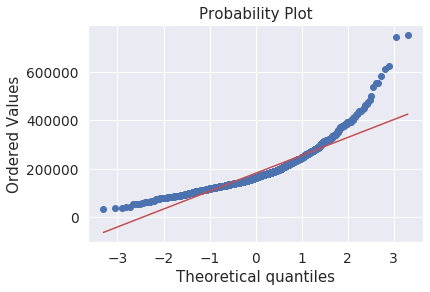

In [373]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show() 

<h3>As you see the sale price value is right skewed. We need to make this normal distributed.</h3>

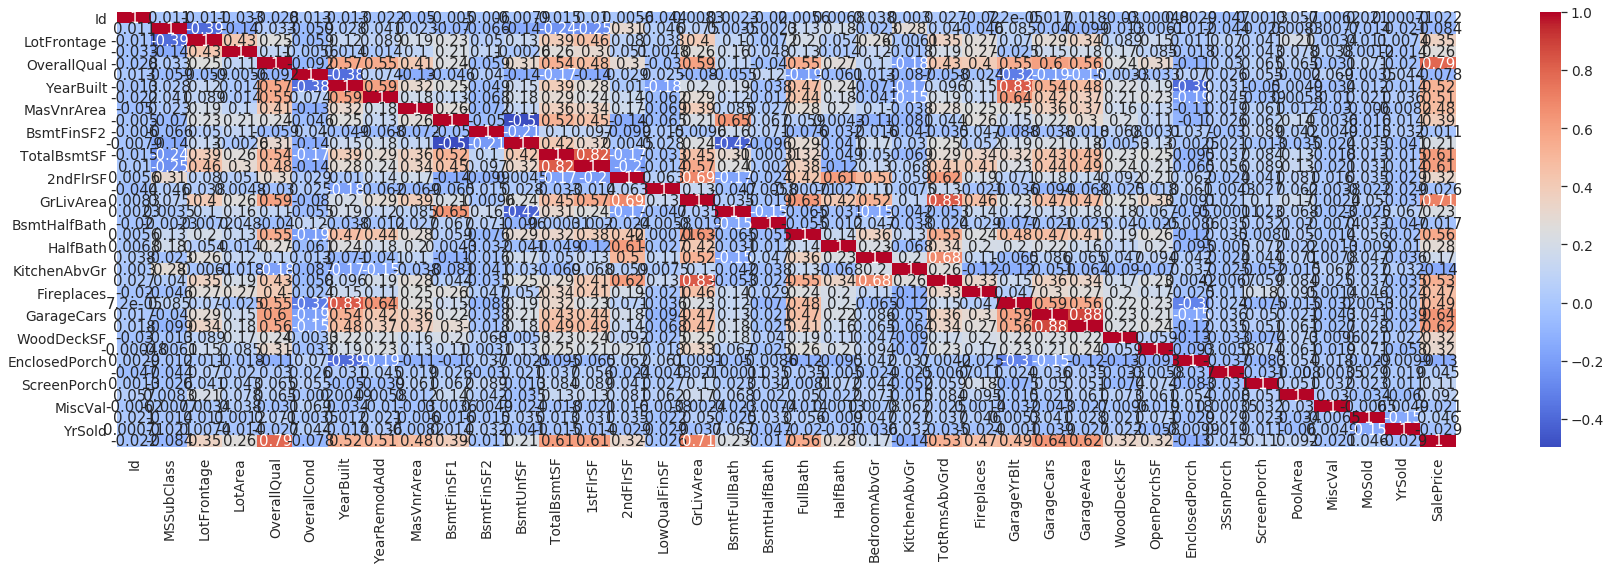

In [374]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),cmap='coolwarm',annot = True)
plt.show()

<h3>we can see the most corelated parameters in numerical values above plotting. And we can pick these as features for our macine learning model.</h3>

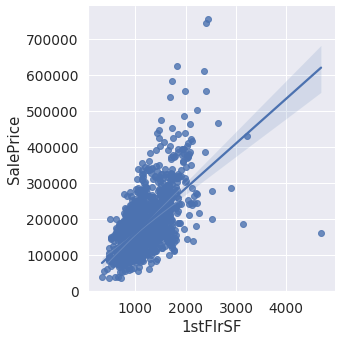

In [375]:
sns.lmplot(x='1stFlrSF',y='SalePrice',data=train) # 1stFlrSF seems very corelated with SalePrice.

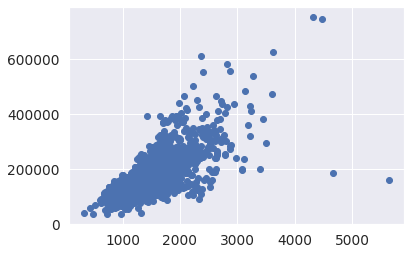

In [376]:
plt.scatter(x= 'GrLivArea', y='SalePrice', data = train)

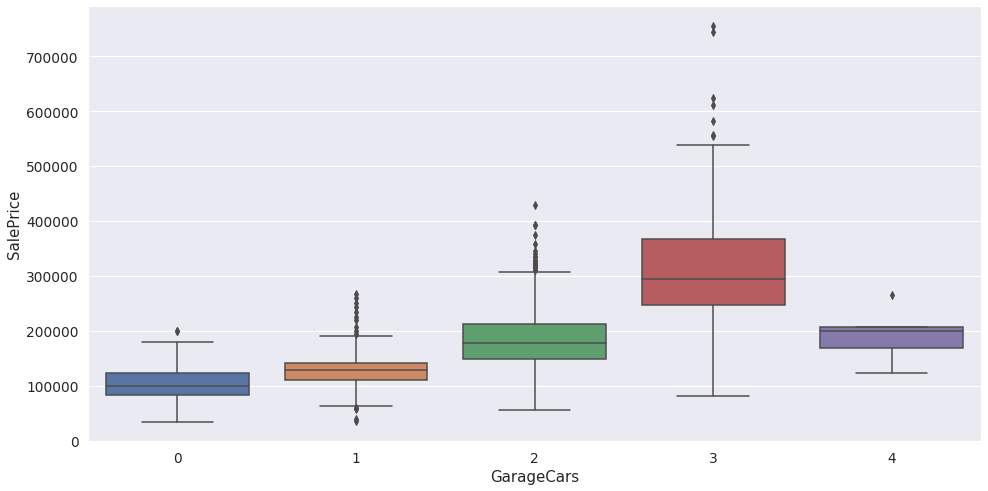

In [377]:
plt.figure(figsize=(16,8))
sns.boxplot(x='GarageCars',y='SalePrice',data=train)
plt.show()

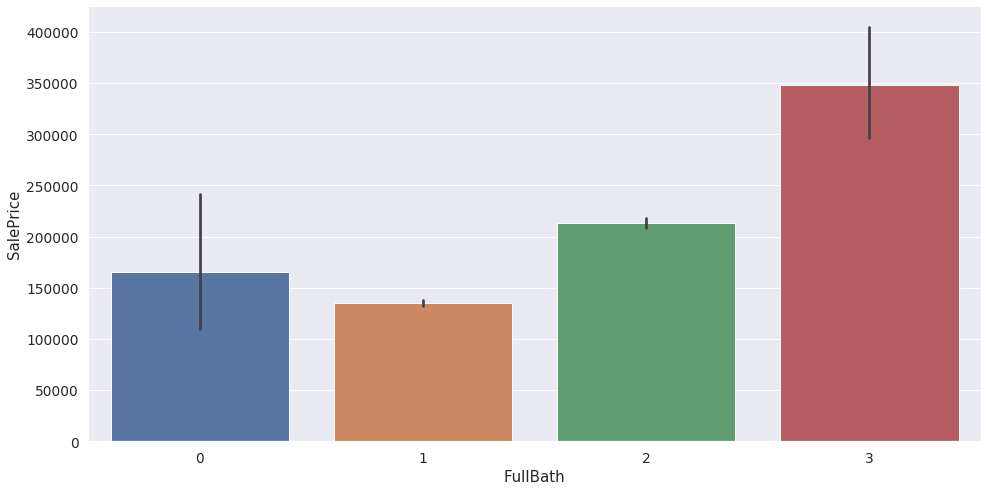

In [378]:
plt.figure(figsize=(16,8))
sns.barplot(x='FullBath',y = 'SalePrice',data=train)
plt.show()

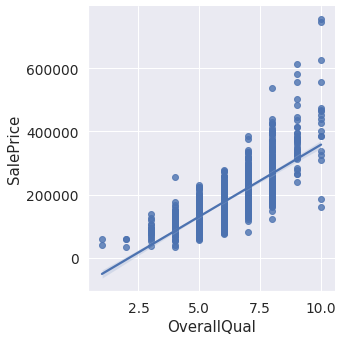

In [379]:
sns.lmplot(x='OverallQual',y='SalePrice',data=train)

<center><h1>Feature Engineering</h1></center>

In [380]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


<h3>As we can see some of paremeters have a lot of missing values. That's why we should drop these from data. And we are going to drop parematers which total value is larger than 81.</h3>

In [381]:
#dealing with missing data
train = train.drop((missing_data[missing_data['Total'] > 81]).index,1)

In [382]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

<h3>We are going to do same thing to the test data.</h3>

In [383]:
#missing data
total_test = test.isnull().sum().sort_values(ascending=False)
percent_test = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(25)

,Total,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [384]:
#dealing with missing data
test = test.drop((missing_data[missing_data['Total'] > 78]).index,1)

In [385]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
GarageFinish    78
GarageCond      78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtHalfBath     2
Functional       2
Utilities        2
BsmtFullBath     2
Exterior2nd      1
Exterior1st      1
KitchenQual      1
dtype: int64

In [386]:
train.isnull().sum().sort_values(ascending = False).head(20)

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageCond      81
GarageQual      81
BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
MasVnrArea       8
Electrical       1
RoofMatl         0
RoofStyle        0
SalePrice        0
Exterior1st      0
Exterior2nd      0
YearBuilt        0
ExterQual        0
dtype: int64

<h3>we need to handle missing data.</h3>

In [387]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()


In [388]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [389]:
# Categorical boolean mask
categorical_feature_mask_test = test.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()

In [390]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test[categorical_cols_test] = test[categorical_cols_test].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [391]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [392]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [393]:
train.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     81
MasVnrArea       8
ExterCond        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
SalePrice        0
YearRemodAdd     0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
Foundation       0
YearBuilt        0
dtype: int64

In [394]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFullBath     2
BsmtHalfBath     2
TotalBsmtSF      1
GarageArea       1
BsmtUnfSF        1
BsmtFinSF1       1
GarageCars       1
BsmtFinSF2       1
LandSlope        0
Neighborhood     0
MSSubClass       0
BsmtFinType1     0
BsmtExposure     0
BsmtCond         0
BsmtQual         0
Foundation       0
ExterCond        0
ExterQual        0
dtype: int64

In [395]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

<h3>Now we are going to pick some features for the model. For this we are going to use correlation matrix and we are going to pick most correlated with sale price.</h3>

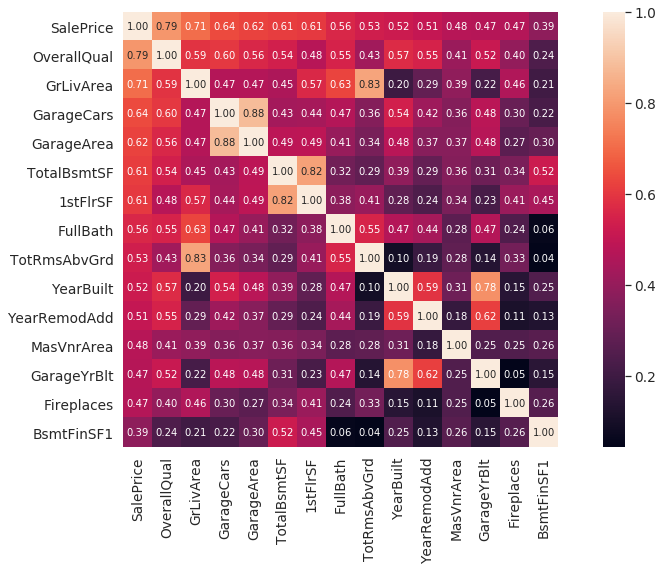

In [396]:
#saleprice correlation matrix
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [397]:
train = train[cols]

In [398]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [399]:
test=test[cols.drop('SalePrice')]

In [400]:
test.isnull().sum().sort_values(ascending=False).head(20)

GarageYrBlt     78
MasVnrArea      15
BsmtFinSF1       1
TotalBsmtSF      1
GarageArea       1
GarageCars       1
Fireplaces       0
YearRemodAdd     0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
1stFlrSF         0
GrLivArea        0
OverallQual      0
dtype: int64

In [401]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [402]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mean())
test['GarageArea'] = test['GarageArea'].fillna(test['GarageArea'].mean())
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean())
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())

<center><h1>Linear Regression.</h1></center>

<center><img src="https://www.researchgate.net/profile/Hieu_Tran33/publication/333457161/figure/fig3/AS:763959762247682@1559153609649/Linear-Regression-model-sample-illustration.ppm" alt="drawing" width="500"/></center>

<h3>It’s a classification algorithm, that is used where the response variable is categorical. The idea of Logistic Regression is to find a relationship between features and probability of particular outcome.</h3>

*  odds= p(x)/(1-p(x)) = probability of event occurrence / probability of not event occurrence

<h3>Example- When we have to predict if a student passes or fails in an exam when the number of hours spent studying is given as a feature, the response variable has two values, pass and fail.</h3>

<center><h1>Train Test Split.</h1></center>

<h3>Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.</h3>

In [403]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)

In [404]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [405]:
X_train

array([[ 1.37391375,  2.5236405 ,  0.31454703, ...,  0.46520725,
         0.58626866,  0.07421157],
       [-1.53923947, -0.2856721 ,  0.31454703, ..., -0.54640203,
        -0.97000815, -1.01837681],
       [ 0.64562544, -0.01580724,  0.31454703, ...,  1.2660646 ,
        -0.97000815, -1.01837681],
       ...,
       [-0.08266286,  0.08903234,  0.31454703, ...,  0.04370339,
         0.58626866, -0.83476756],
       [ 0.64562544,  0.03855402,  0.31454703, ...,  1.09746305,
         0.58626866,  1.86950201],
       [-0.81095116, -0.70308897, -1.02489906, ..., -0.84145473,
        -0.97000815,  1.58388762]])

<h3>Creating and Training the Model</h3>

In [406]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [407]:
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


<h3>Model Evaluation</h3> 
<p>Let's evaluate the model by checking out it's coefficients and how we can interpret them.</p>

In [408]:
# print the intercept
print(lm.intercept_)

[6.60022817e-17]


In [409]:
print(lm.coef_)

[[ 0.29434388  0.31107005  0.05109985  0.06398884  0.11932473  0.02209143
  -0.044909    0.0334707   0.07675313  0.09456834  0.05714788  0.01910605
   0.04584189  0.1392006 ]]


<h3>Predictions from our Model</h3> 
<p>Let's grab predictions off our test set and see how well it did!</p>

In [410]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

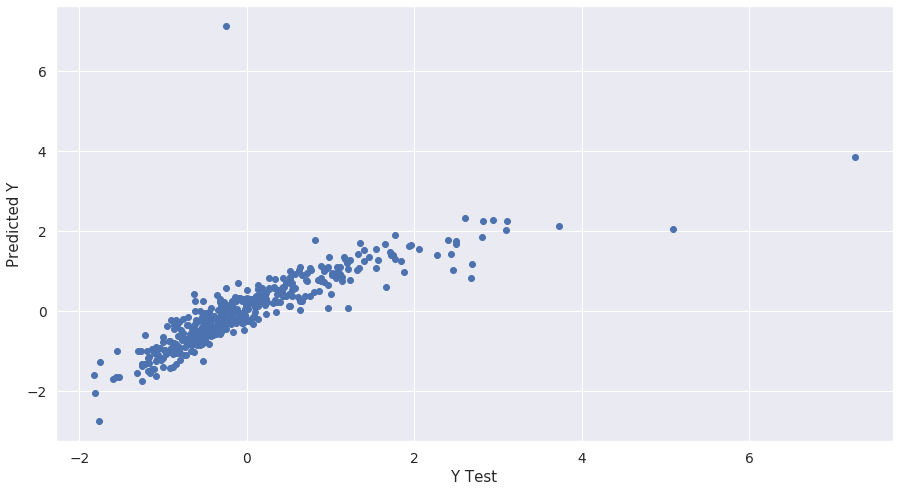

In [411]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

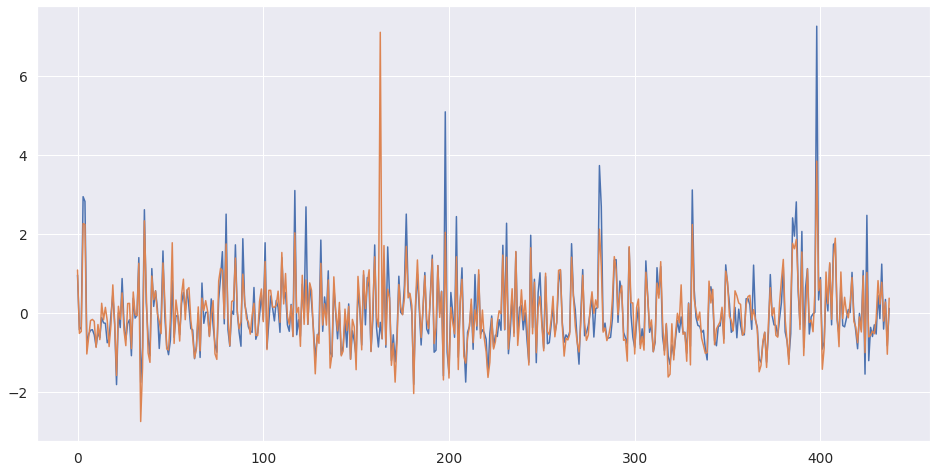

In [412]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()

<h3>Regression Evaluation Metrics</h3>
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

*  1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

* 1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

* 1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [413]:
from sklearn import metrics

In [414]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.29105407971784336
MSE: 0.29995756024517584
RMSE: 0.5476838141164807


<center><h1>Decision Tree Regression.</h1></center>

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/qa.png" alt="drawing" width="500"/></center>

<h3>Decision tree algorithm is classification algorithm under supervised machine learning and it is simple to understand and use in data.The idea of Decision tree is to split the big data(root) into smaller(leaves)</h3>

In [415]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [416]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

In [417]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

MAE: 0.3327904077116327
MSE: 0.2297983841710415
RMSE: 0.4793729072142496


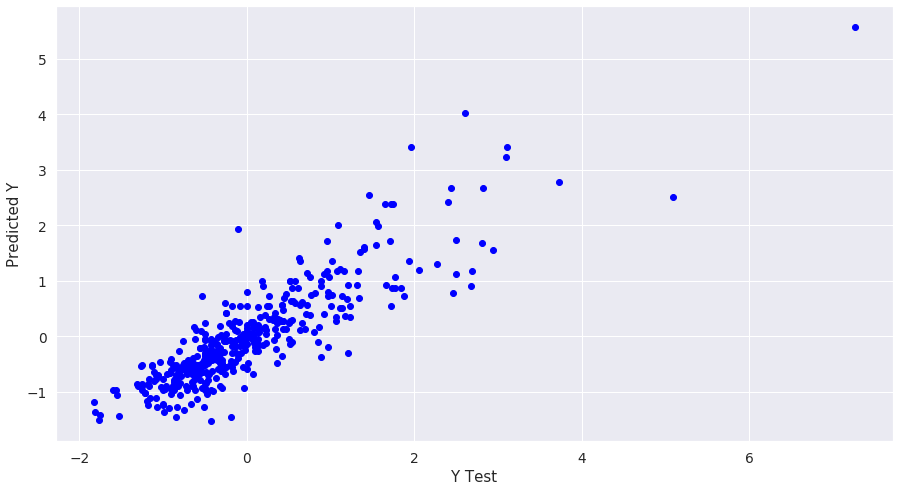

In [418]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<center><h1>Support Vector Machine Regression.</h1></center>

<center><img src="https://www.saedsayad.com/images/SVR_1.png" alt="drawing" width="500"/></center>

<center><img src="https://www.saedsayad.com/images/SVR_2.png" alt="drawing" width="500"/></center>

<h3>Support Vector Machines are perhaps one of the most popular and talked about machine learning algorithms.It is primarily a classier method that performs classification tasks by constructing hyperplanes in a multidimensional space that separates cases of different class labels. SVM supports both regression and classification tasks and can handle multiple continuous and categorical variables

Example: One class is linearly separable from the others like if we only had two features like Height and Hair length of an individual, we’d first plot these two variables in two dimensional space where each point has two co-ordinates.</h3>

In [419]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [420]:
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

In [421]:
print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

MAE: 0.23401679589999025
MSE: 0.1899647870349416
RMSE: 0.43584950044131243


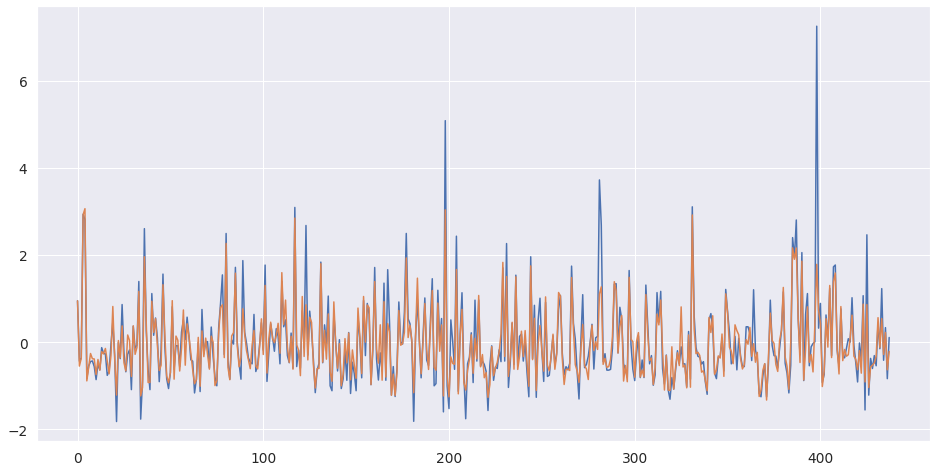

In [422]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(svr_pred, label = 'predict')
plt.show()

<center><h1>Random Forest.</h1></center>

<center><img src="https://cdn-images-1.medium.com/max/800/1*jEGFJCm4VSG0OzoqFUQJQg.jpeg" alt="drawing" width="500"/></center>

<h3>Random forest is collection of tress(forest) and it builds multiple decision trees and merges them together to get a more accurate and stable prediction.It can be used for both classification and regression problems.

Example: Suppose we have a bowl of 100 unique numbers from 0 to 99. We want to select a random sample of numbers from the bowl. If we put the number back in the bowl, it may be selected more than once.</h3>

In [423]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 500, random_state = 0)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [424]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

In [425]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 0.23723064460015603
MSE: 0.15361242417115376
RMSE: 0.3919342089830304


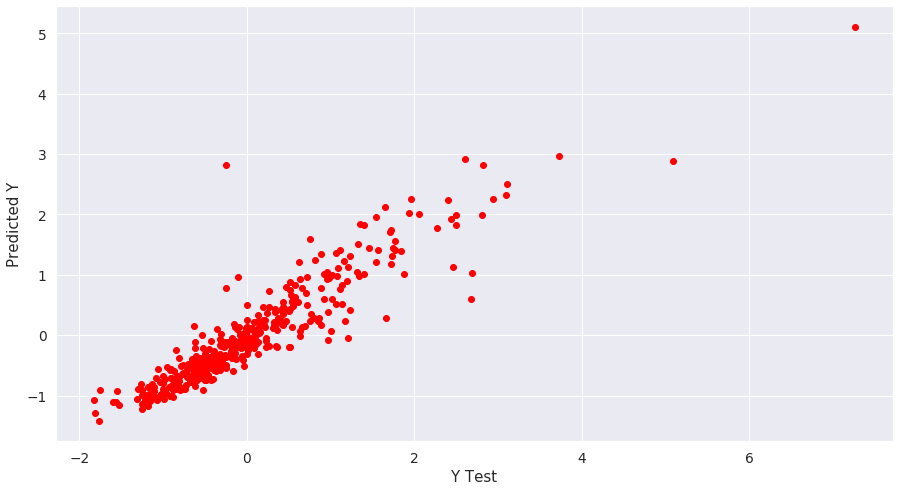

In [426]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c="red")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<center><h1>Gradient Boosting Regression.</h1></center>

<center><img src="https://images.akira.ai/glossary/gradient-boosting-ml-technique-akira-ai.png" alt="drawing" width="700"/></center>

<h3>Gradient boosting is an alogithm under supervised machine learning, boosting means converting weak into strong. In this new tree is boosted over the previous tree</h3>

In [427]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [428]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=500,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [429]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [430]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.22812065391052525
MSE: 0.11720035006652846
RMSE: 0.342345366649716


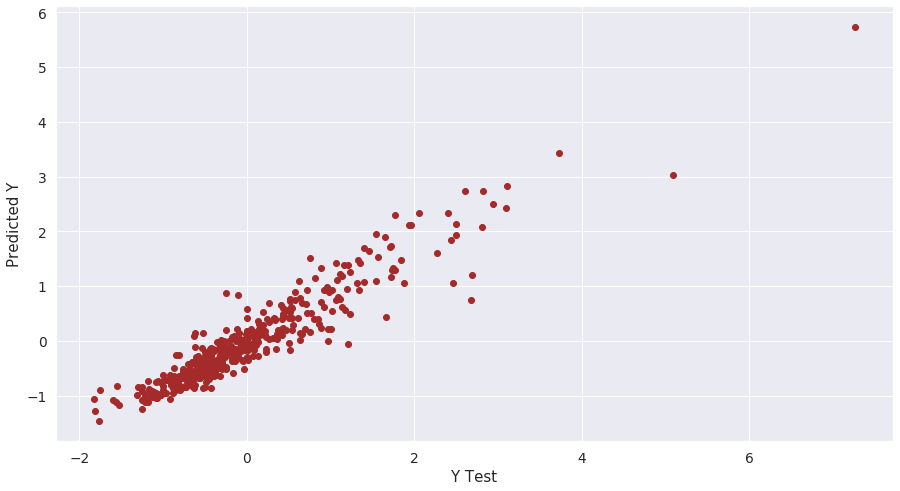

In [431]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,clf_pred, c= 'brown')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<center><h1>LightGBM.</h1></center>

<center><img src="https://miro.medium.com/max/1400/1*AZsSoXb8lc5N6mnhqX5JCg.png" alt="drawing" width="700"/></center>

<center><img src="https://miro.medium.com/max/1400/1*whSa8rY4sgFQj1rEcWr8Ag.png" alt="drawing" width="700"/></center>

<h3>LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:</h3>

1. Faster training speed and higher efficiency.
1. Lower memory usage.
1. Better accuracy.
1. Support of parallel and GPU learning.
1. Capable of handling large-scale data.

In [432]:
import lightgbm as lgb

In [433]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.01, n_estimators=3000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [434]:
model_lgb.fit(X_train,y_train)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              feature_fraction=0.2319, feature_fraction_seed=9,
              importance_type='split', learning_rate=0.01, max_bin=55,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_data_in_leaf=6, min_split_gain=0.0,
              min_sum_hessian_in_leaf=11, n_estimators=3000, n_jobs=-1,
              num_leaves=5, objective='regression', random_state=None,
              reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [435]:
lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)

In [436]:
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

MAE: 0.24588472762255686
MSE: 0.15938349328062001
RMSE: 0.39922862282233723


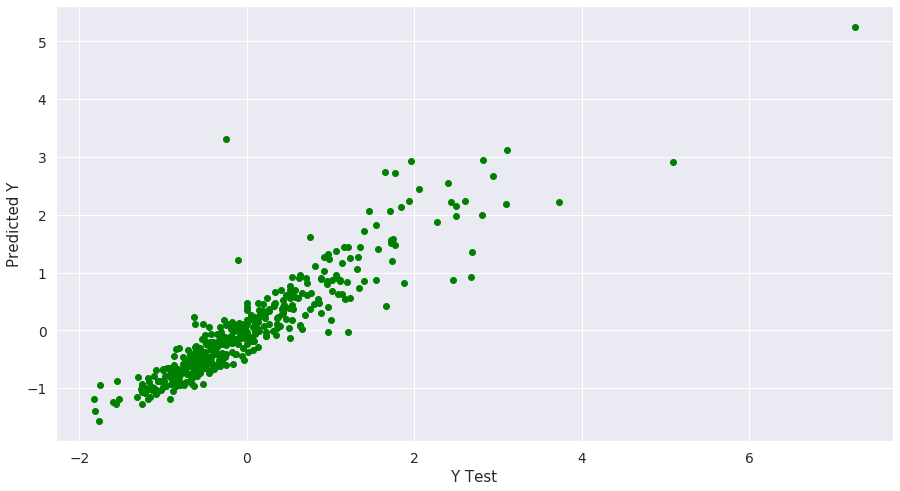

In [437]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,lgb_pred, c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

<center><h1>Model Comparison.</h1></center>

<h3>We can say the best working model by loking MSE rates The best working model is Support Vector Machine. We are going to see the error rate. which one is better?</h3>

In [438]:
error_rate=np.array([metrics.mean_squared_error(y_test, predictions),metrics.mean_squared_error(y_test, clf_pred),metrics.mean_squared_error(y_test, dtr_pred),metrics.mean_squared_error(y_test, svr_pred),metrics.mean_squared_error(y_test, rfr_pred)])

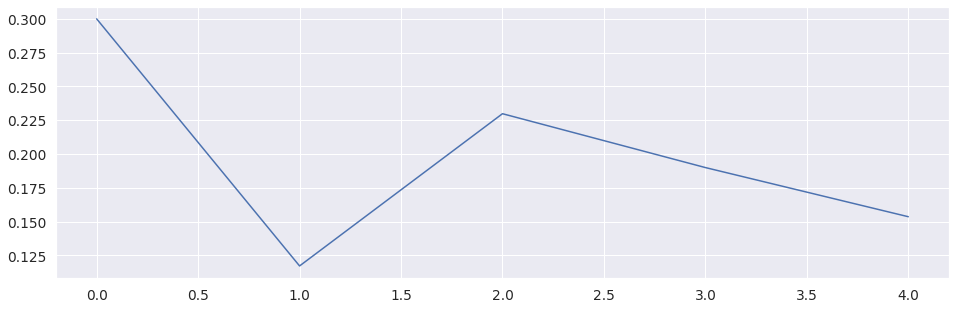

In [439]:
plt.figure(figsize=(16,5))
plt.plot(error_rate)

<h3>Now we will use test data.</h3>

In [440]:
a = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [441]:
test_id = a['Id']
a = pd.DataFrame(test_id, columns=['Id'])


In [442]:
test = sc_X.fit_transform(test)

In [443]:
test.shape

(1459, 14)

In [444]:
test_prediction_lgbm=model_lgb.predict(test)
test_prediction_lgbm= test_prediction_lgbm.reshape(-1,1)

In [445]:
test_prediction_lgbm

array([[-0.75624754],
       [-0.42234108],
       [ 0.02235828],
       ...,
       [-0.11373376],
       [-0.7102517 ],
       [ 0.88751194]])

In [446]:
test_prediction_lgbm =sc_y.inverse_transform(test_prediction_lgbm)

In [447]:
test_prediction_lgbm = pd.DataFrame(test_prediction_lgbm, columns=['SalePrice'])

In [448]:
test_prediction_lgbm.head()

,SalePrice
0,119326.133570
1,145814.057076
2,181090.890730
3,186130.192018
4,197693.319148


In [449]:
result = pd.concat([a,test_prediction_lgbm], axis=1)

In [450]:
result.head()

,Id,SalePrice
0,1461,119326.133570
1,1462,145814.057076
2,1463,181090.890730
3,1464,186130.192018
4,1465,197693.319148


In [451]:
result.to_csv('submission.csv',index=False)

<center><h1>CNN.</h1></center>

<center><img src="https://miro.medium.com/max/3288/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" alt="drawing" width="700"/></center>

<h3>In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.</h3>

<h3>Library and Data.</h3>

In [456]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf
train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h3>Preprocessing and Data Split.</h3>

In [460]:
# X = np.array(train_data.drop("label", axis=1)).astype('float32')
# y = np.array(train_data['label']).astype('float32')
# for i in range(9):
#     plt.subplot(3,3,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X[i].reshape(28, 28), cmap=plt.cm.binary)
#     plt.xlabel(y[i])
# plt.show()

# X = X / 255.0
# X = X.reshape(-1, 28, 28, 1)
# y = to_categorical(y)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
# X_test = np.array(test_data).astype('float32')
# X_test = X_test / 255.0
# X_test = X_test.reshape(-1, 28, 28, 1)
# plt.figure(figsize=(10,10))

<h3>Model.</h3>

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)         

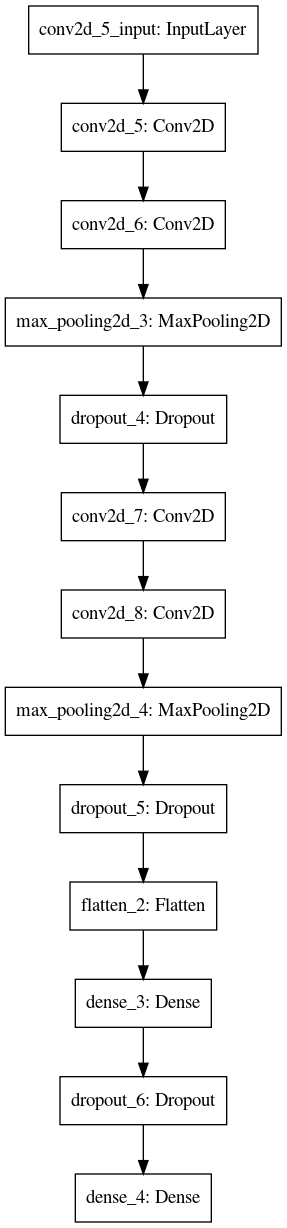

In [461]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model1.png')


In [467]:
# #increse to epochs to 30 for better accuracy
# model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
# history = model.fit(X_train, y_train, epochs=10, batch_size=85, validation_data=(X_val, y_val))

In [469]:
# accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
# epochs = range(len(accuracy))
# plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
# plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
# plt.show()

# print(model.evaluate(X_val, y_val))


I wanted to use a neural network, but nothing happened

If you like this notebook, do hit upvote


<center><h1>Thank you for your attention.</h1></center>